In [554]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

#Imports libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.feature_selection import RFE

#### Dataset source

In [555]:
bike_df = pd.read_csv("day.csv")

In [556]:
# Check the head of the dataset
bike_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [557]:
bike_df.shape

(730, 16)

In [558]:
# Check the descriptive information
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [559]:
bike_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


## Observation : 
There are 730 rows and 16 columns in Dataset.
All other are either float or integer type except. 
there seems to be some fields that are categorical in nature, but in integer/float type.
We will analyse and finalize whether to convert them to categorical or treat as integer.

### Check for NULL/MISSING values

In [560]:
# missing values in each column
(bike_df.isnull().sum()/len(bike_df.shape)).sort_values(ascending=False)

instant       0.0
dteday        0.0
season        0.0
yr            0.0
mnth          0.0
holiday       0.0
weekday       0.0
workingday    0.0
weathersit    0.0
temp          0.0
atemp         0.0
hum           0.0
windspeed     0.0
casual        0.0
registered    0.0
cnt           0.0
dtype: float64

In [561]:
# row-wise null count
(bike_df.isnull().sum(axis=1)/len(bike_df.shape)).sort_values(ascending=False)

0      0.0
479    0.0
481    0.0
482    0.0
483    0.0
      ... 
245    0.0
246    0.0
247    0.0
248    0.0
729    0.0
Length: 730, dtype: float64

### Finding
There are no missing / Null values either in columns or rows

### Duplicate Check

In [562]:
bike_dup = bike_df.copy()

# Checking for duplicates and dropping the entire duplicate row if any
bike_dup.drop_duplicates(subset=None, inplace=True)

In [563]:
bike_dup.shape

(730, 16)

In [564]:
bike_df.shape

(730, 16)

### Conclusion 

Since bike_dup dataframe shape is same as the original dataframe.Hence we can conclude that there were zero duplicate values in the dataset. 

#### Data Cleaning

Checking value_counts() for entire dataframe and identify any Unknow/Junk values present in the dataset.

In [565]:
#Create a copy of the  dataframe, without the 'instant' column, 
#as this will have unique values, and donot make sense to do a value count on it.
bike_dummy=bike_df.iloc[:,1:16]

In [566]:
#mapping of variables
bike_df.yr = bike_df.yr.map({0:'2018',1:'2019'})
bike_df.weathersit = bike_df.weathersit.map({1:'Clear',2:'Misty',3:'Light_rain',4:'Heavy_rain'})
bike_df.weekday = bike_df.weekday.map({0:'sun',1:'mon',2:'tue',3:'wed',4:'thu',5:'fri',6:'sat'})
bike_df['mnth'] = bike_df['mnth'].map({1:'jan',2:'feb',3:'mar',4:'apr',5:'may',6:'june',7:'july',8:'aug',9:'sep',10:'oct',11:'nov',12:'dec'})
bike_df['season'] = bike_df['season'].map({1:'spring',2:'summer',3:'fall',4:'winter'})

In [567]:
bike_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,spring,2018,jan,0,sat,0,Misty,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,spring,2018,jan,0,sun,0,Misty,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,spring,2018,jan,0,mon,1,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,spring,2018,jan,0,tue,1,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,spring,2018,jan,0,wed,1,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


### Conclusion 
There seems to be no Junk/Unknown values in the entire dataset.

In [568]:
#### Removing unwanted or duplicate columns
# **instant** : Its only an index value
# **dteday** : This has the date, Since we already have seperate columns for 'year' & 'month',hence, we could live without this column. 
#  **casual & registered** : Both these columns contains the count of bike booked by different categories of customers.
bike_new=bike_df[['season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt']]


In [569]:
bike_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    object 
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(3), object(5)
memory usage: 68.6+ KB


### Creating Dummy Variables

In [570]:
# Check the datatypes before convertion
bike_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    object 
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(3), object(5)
memory usage: 68.6+ KB


In [571]:
#Creating DUMMY variables for 4 categorical variables 'mnth', 'weekday', 'season' & 'weathersit'. 
# Convert them into 'category' data types
bike_new['season']=bike_new['season'].astype('category')
bike_new['weathersit']=bike_new['weathersit'].astype('category')
bike_new['mnth']=bike_new['mnth'].astype('category')
bike_new['weekday']=bike_new['weekday'].astype('category')

In [572]:
bike_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   season      730 non-null    category
 1   yr          730 non-null    object  
 2   mnth        730 non-null    category
 3   holiday     730 non-null    int64   
 4   weekday     730 non-null    category
 5   workingday  730 non-null    int64   
 6   weathersit  730 non-null    category
 7   temp        730 non-null    float64 
 8   atemp       730 non-null    float64 
 9   hum         730 non-null    float64 
 10  windspeed   730 non-null    float64 
 11  cnt         730 non-null    int64   
dtypes: category(4), float64(4), int64(3), object(1)
memory usage: 49.7+ KB


In [573]:
# This code does 3 things:
# 1) Create Dummy variable
# 2) Drop original variable for which the dummy was created
# 3) Drop first dummy variable for each set of dummies created.
bike_new = pd.get_dummies(bike_new, drop_first=True)
bike_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   holiday                730 non-null    int64  
 1   workingday             730 non-null    int64  
 2   temp                   730 non-null    float64
 3   atemp                  730 non-null    float64
 4   hum                    730 non-null    float64
 5   windspeed              730 non-null    float64
 6   cnt                    730 non-null    int64  
 7   season_spring          730 non-null    uint8  
 8   season_summer          730 non-null    uint8  
 9   season_winter          730 non-null    uint8  
 10  yr_2019                730 non-null    uint8  
 11  mnth_aug               730 non-null    uint8  
 12  mnth_dec               730 non-null    uint8  
 13  mnth_feb               730 non-null    uint8  
 14  mnth_jan               730 non-null    uint8  
 15  mnth_j

In [574]:
bike_new.shape

(730, 30)

In [575]:
# Check the shape before spliting
bike_new.shape

(730, 30)

In [576]:
# Check the info before spliting
bike_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   holiday                730 non-null    int64  
 1   workingday             730 non-null    int64  
 2   temp                   730 non-null    float64
 3   atemp                  730 non-null    float64
 4   hum                    730 non-null    float64
 5   windspeed              730 non-null    float64
 6   cnt                    730 non-null    int64  
 7   season_spring          730 non-null    uint8  
 8   season_summer          730 non-null    uint8  
 9   season_winter          730 non-null    uint8  
 10  yr_2019                730 non-null    uint8  
 11  mnth_aug               730 non-null    uint8  
 12  mnth_dec               730 non-null    uint8  
 13  mnth_feb               730 non-null    uint8  
 14  mnth_jan               730 non-null    uint8  
 15  mnth_j

In [577]:
from sklearn.model_selection import train_test_split

# We should specify 'random_state' so that the train and test data set always have the same rows, respectively

np.random.seed(0)
df_train, df_test = train_test_split(bike_new, train_size = 0.70, test_size = 0.30, random_state = 333)


- Verify the info and shape of the dataframes after split:

In [578]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 510 entries, 483 to 366
Data columns (total 30 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   holiday                510 non-null    int64  
 1   workingday             510 non-null    int64  
 2   temp                   510 non-null    float64
 3   atemp                  510 non-null    float64
 4   hum                    510 non-null    float64
 5   windspeed              510 non-null    float64
 6   cnt                    510 non-null    int64  
 7   season_spring          510 non-null    uint8  
 8   season_summer          510 non-null    uint8  
 9   season_winter          510 non-null    uint8  
 10  yr_2019                510 non-null    uint8  
 11  mnth_aug               510 non-null    uint8  
 12  mnth_dec               510 non-null    uint8  
 13  mnth_feb               510 non-null    uint8  
 14  mnth_jan               510 non-null    uint8  
 15  mnth

In [579]:
df_train.shape

(510, 30)

In [580]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219 entries, 22 to 313
Data columns (total 30 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   holiday                219 non-null    int64  
 1   workingday             219 non-null    int64  
 2   temp                   219 non-null    float64
 3   atemp                  219 non-null    float64
 4   hum                    219 non-null    float64
 5   windspeed              219 non-null    float64
 6   cnt                    219 non-null    int64  
 7   season_spring          219 non-null    uint8  
 8   season_summer          219 non-null    uint8  
 9   season_winter          219 non-null    uint8  
 10  yr_2019                219 non-null    uint8  
 11  mnth_aug               219 non-null    uint8  
 12  mnth_dec               219 non-null    uint8  
 13  mnth_feb               219 non-null    uint8  
 14  mnth_jan               219 non-null    uint8  
 15  mnth_

In [581]:
df_test.shape

(219, 30)

# EDA


- We need to  perform the EDA on TRAINING (df_train) Dataset.

### Visualising Numeric Variables
Let's make a pairplot of all the numeric variables.

In [582]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 510 entries, 483 to 366
Data columns (total 30 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   holiday                510 non-null    int64  
 1   workingday             510 non-null    int64  
 2   temp                   510 non-null    float64
 3   atemp                  510 non-null    float64
 4   hum                    510 non-null    float64
 5   windspeed              510 non-null    float64
 6   cnt                    510 non-null    int64  
 7   season_spring          510 non-null    uint8  
 8   season_summer          510 non-null    uint8  
 9   season_winter          510 non-null    uint8  
 10  yr_2019                510 non-null    uint8  
 11  mnth_aug               510 non-null    uint8  
 12  mnth_dec               510 non-null    uint8  
 13  mnth_feb               510 non-null    uint8  
 14  mnth_jan               510 non-null    uint8  
 15  mnth

In [583]:
df_train.columns

Index(['holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed', 'cnt',
       'season_spring', 'season_summer', 'season_winter', 'yr_2019',
       'mnth_aug', 'mnth_dec', 'mnth_feb', 'mnth_jan', 'mnth_july',
       'mnth_june', 'mnth_mar', 'mnth_may', 'mnth_nov', 'mnth_oct', 'mnth_sep',
       'weekday_mon', 'weekday_sat', 'weekday_sun', 'weekday_thu',
       'weekday_tue', 'weekday_wed', 'weathersit_Light_rain',
       'weathersit_Misty'],
      dtype='object')

### Insights
- The above Pair-Plot tells us that there is a LINEAR RELATION between 'temp','atemp' and 'cnt' 

### Visualising Catagorical Variables

In [584]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 510 entries, 483 to 366
Data columns (total 30 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   holiday                510 non-null    int64  
 1   workingday             510 non-null    int64  
 2   temp                   510 non-null    float64
 3   atemp                  510 non-null    float64
 4   hum                    510 non-null    float64
 5   windspeed              510 non-null    float64
 6   cnt                    510 non-null    int64  
 7   season_spring          510 non-null    uint8  
 8   season_summer          510 non-null    uint8  
 9   season_winter          510 non-null    uint8  
 10  yr_2019                510 non-null    uint8  
 11  mnth_aug               510 non-null    uint8  
 12  mnth_dec               510 non-null    uint8  
 13  mnth_feb               510 non-null    uint8  
 14  mnth_jan               510 non-null    uint8  
 15  mnth

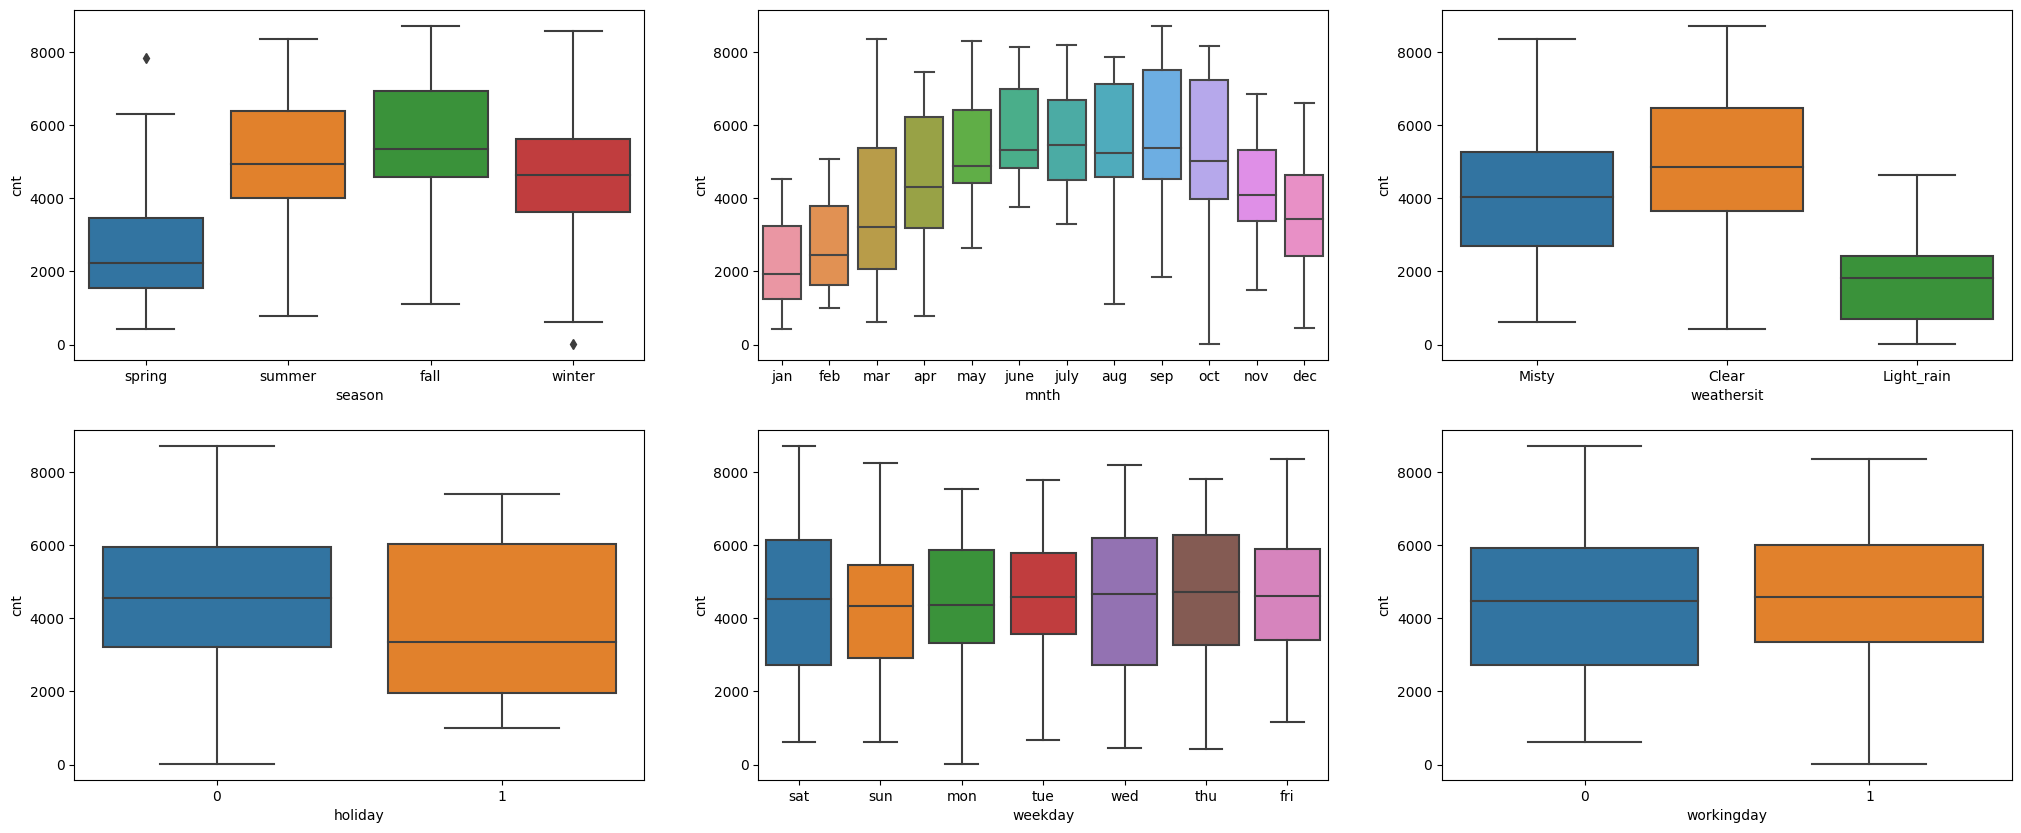

In [585]:
# Build boxplot of all categorical variables (before creating dummies) againt the target variable 'cnt' 
# to see how each of the predictor variable stackup against the target variable.
plt.figure(figsize=(25, 10))
plt.subplot(2,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = bike_df)
plt.subplot(2,3,2)
sns.boxplot(x = 'mnth', y = 'cnt', data = bike_df)
plt.subplot(2,3,3)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bike_df)
plt.subplot(2,3,4)
sns.boxplot(x = 'holiday', y = 'cnt', data = bike_df)
plt.subplot(2,3,5)
sns.boxplot(x = 'weekday', y = 'cnt', data = bike_df)
plt.subplot(2,3,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = bike_df)
plt.show()

<AxesSubplot: xlabel='season', ylabel='cnt'>

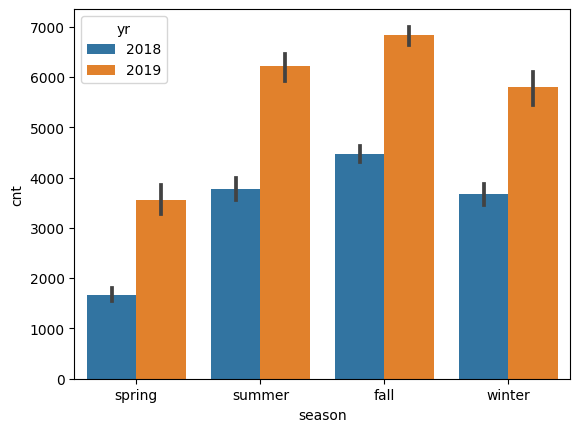

In [586]:
# Comparing to 2018, in 2019 there was high demand
sns.barplot(data=bike_df, x= 'season', y='cnt',hue='yr',estimator = np.mean)

<AxesSubplot: xlabel='mnth', ylabel='cnt'>

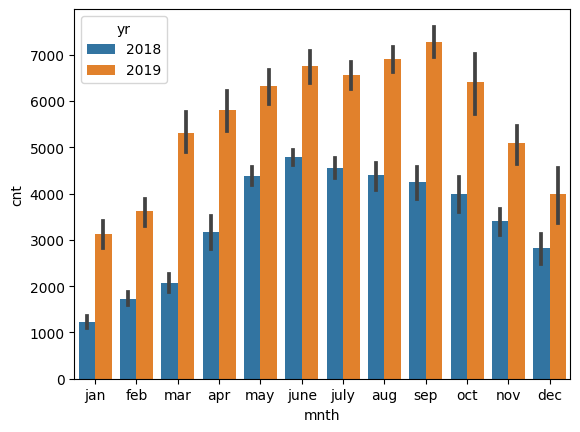

In [587]:
#Most booking happens on Fall season
sns.barplot(data=bike_df, x= 'mnth', y='cnt',hue='yr',estimator = np.mean)

<AxesSubplot: xlabel='holiday', ylabel='cnt'>

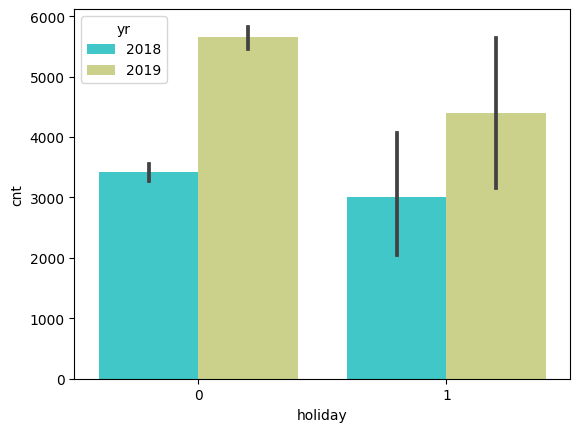

In [588]:
#ooking trend increase from starting till mid year and then it started decreasing. This is the same trend in both years
sns.barplot(data=bike_df, x= 'holiday', y='cnt',hue='yr',estimator = np.mean, palette = 'rainbow')

<AxesSubplot: xlabel='weekday', ylabel='cnt'>

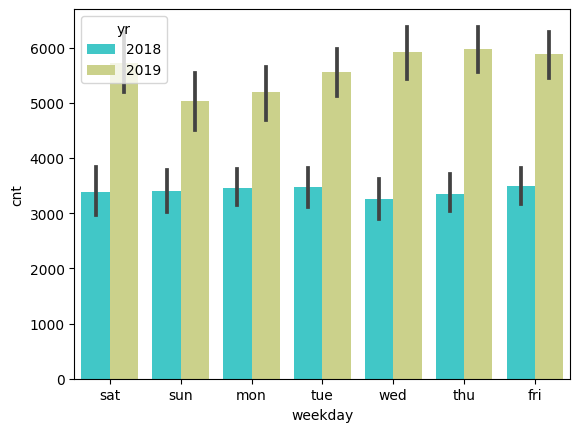

In [589]:
#Demand is less on Holidays and is understandable
sns.barplot(data=bike_df, x= 'weekday', y='cnt',hue='yr',estimator = np.mean, palette = 'rainbow')

<AxesSubplot: xlabel='weathersit', ylabel='cnt'>

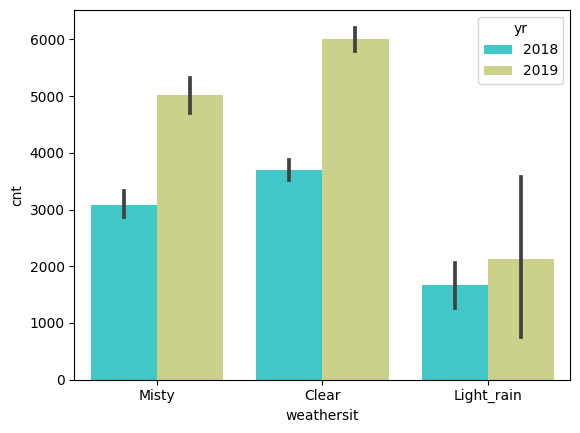

In [590]:
#Looks like demand is more on days approaching weekends
sns.barplot(data=bike_df, x= 'weathersit', y='cnt',hue='yr',estimator = np.mean, palette = 'rainbow')

<AxesSubplot: xlabel='workingday', ylabel='cnt'>

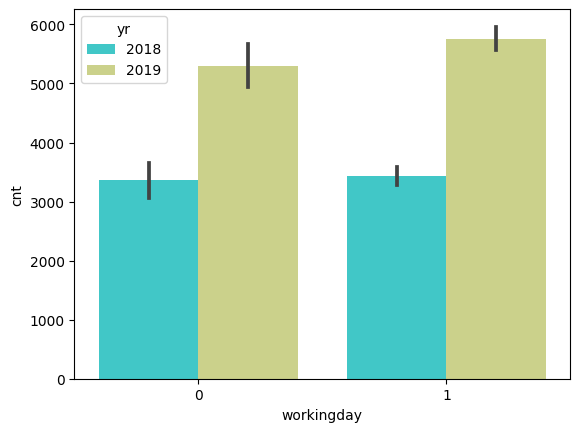

In [591]:
#Clear weather is having more booking in both years
sns.barplot(data=bike_df, x= 'workingday', y='cnt',hue='yr',estimator = np.mean, palette = 'rainbow')

### Conclusion
There were 6 categorical variables. 

We used Box plot (refer the fig above) to study their effect on the dependent variable (‘cnt’) . 
The inference that We could derive were: 
- **season**: Almost 32% of the bike booking were happening in season3 with a median of over 5000 booking (for the period of 2 years). This was followed by season2 & season4 with 27% & 25% of total booking. This indicates, season can be a good predictor for the dependent variable.

- **mnth**: Almost 10% of the bike booking were happening in the months may,june,july,aug & sep with a median of over 4000 booking per month. This indicates, mnth has some trend for bookings and can be a good predictor for the dependent variable. 
- **weathersit**: Almost 67% of the bike booking were happening during ‘weathersit1 with a median of close to 5000 booking (for the period of 2 years). This was followed by weathersit2 with 30% of total booking. This indicates, weathersit does show some trend towards the bike bookings can be a good predictor for the dependent variable.
- **holiday**: Almost 97.6% of the bike booking were happening when it is not a holiday which means this data is clearly biased. This indicates, holiday CANNOT be a good predictor for the dependent variable. 
- **weekday**: weekday variable shows very close trend (between 13.5%-14.8% of total booking on all days of the week) having their independent medians between 4000 to 5000 bookings. This variable can have some or no influence towards the predictor. I will let the model decide if this needs to be added or not.
- **workingday**: Almost 69% of the bike booking were happening in ‘workingday’ with a median of close to 5000 booking (for the period of 2 years). This indicates, workingday can be a good predictor for the dependent variable

#### Correlation Matrix

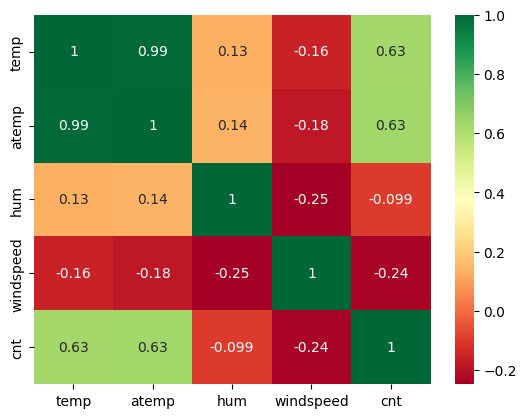

In [592]:
# Correlation coefficients to see which variables are highly correlated
sns.heatmap(bike_df[['temp','atemp','hum','windspeed','cnt']].corr(),annot=True,cmap="RdYlGn")
plt.show()

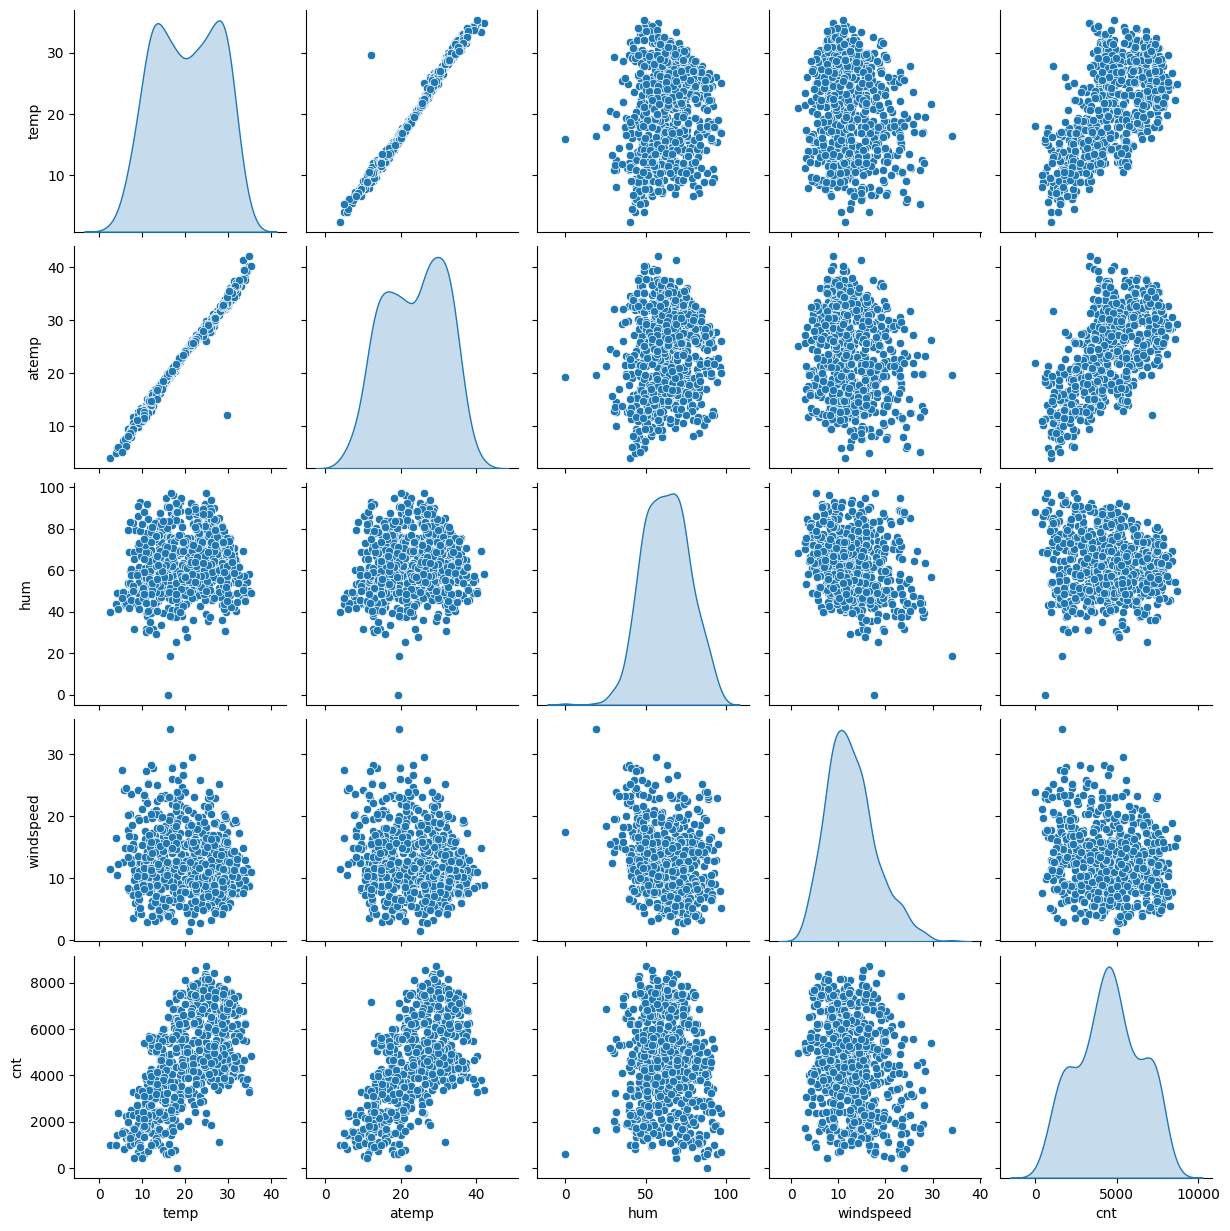

In [593]:
# Create a new dataframe of only numeric variables:
sns.pairplot(bike_df[['temp','atemp','hum','windspeed','cnt']], diag_kind='kde')
plt.show()

 - The heatmap clearly shows which all variable are multicollinear in nature, and which variable have high collinearity with the target variable.
 - We will refer this map back-and-forth while building the linear model so as to validate different correlated values along with VIF & p-value, for identifying the correct variable to select/eliminate from the model.

### Split train and test data
- Splitting the data to Train and Test: - We will now split the data into TRAIN and TEST (70:30 ratio) 
- We will use train_test_split method from sklearn package for this

### Rescaling the fetures

In [594]:
scaler = MinMaxScaler()

In [595]:
# Checking the values before scaling
df_train.head()

,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,season_winter,...,mnth_oct,mnth_sep,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_Light_rain,weathersit_Misty
483,0,0,18.791653,22.50605,58.7083,7.832836,6304,0,1,0,...,0,0,0,0,1,0,0,0,0,0
650,0,0,16.126653,19.56980,49.4583,9.791514,7109,0,0,1,...,1,0,0,1,0,0,0,0,0,0
212,0,1,31.638347,35.16460,55.0833,10.500039,4266,0,0,0,...,0,0,1,0,0,0,0,0,0,0
714,0,0,14.862500,18.49690,83.8750,6.749714,3786,0,0,1,...,0,0,0,0,1,0,0,0,0,1
8,0,0,5.671653,5.80875,43.4167,24.250650,822,1,0,0,...,0,0,0,0,1,0,0,0,0,0


In [596]:
df_train.columns

Index(['holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed', 'cnt',
       'season_spring', 'season_summer', 'season_winter', 'yr_2019',
       'mnth_aug', 'mnth_dec', 'mnth_feb', 'mnth_jan', 'mnth_july',
       'mnth_june', 'mnth_mar', 'mnth_may', 'mnth_nov', 'mnth_oct', 'mnth_sep',
       'weekday_mon', 'weekday_sat', 'weekday_sun', 'weekday_thu',
       'weekday_tue', 'weekday_wed', 'weathersit_Light_rain',
       'weathersit_Misty'],
      dtype='object')

In [597]:
# Apply scaler() to all the numeric variables
num_vars = ['temp', 'atemp', 'hum', 'windspeed','cnt']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [598]:
# Checking values after scaling
df_train.head()

,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,season_winter,...,mnth_oct,mnth_sep,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_Light_rain,weathersit_Misty
483,0,0,0.497426,0.487055,0.609956,0.194850,0.722734,0,1,0,...,0,0,0,0,1,0,0,0,0,0
650,0,0,0.416433,0.409971,0.513852,0.255118,0.815347,0,0,1,...,1,0,0,1,0,0,0,0,0,0
212,0,1,0.887856,0.819376,0.572294,0.276919,0.488265,0,0,0,...,0,0,1,0,0,0,0,0,0,0
714,0,0,0.378013,0.381804,0.871429,0.161523,0.433042,0,0,1,...,0,0,0,0,1,0,0,0,0,1
8,0,0,0.098690,0.048706,0.451083,0.700017,0.092039,1,0,0,...,0,0,0,0,1,0,0,0,0,0


In [599]:
df_train.describe()

,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,season_winter,...,mnth_oct,mnth_sep,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_Light_rain,weathersit_Misty
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.00000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.023529,0.682353,0.540901,0.515631,0.647390,0.346318,0.515144,0.24902,0.247059,0.241176,...,0.084314,0.082353,0.139216,0.150980,0.143137,0.129412,0.141176,0.150980,0.025490,0.341176
std,0.151726,0.466018,0.227898,0.213626,0.149722,0.160266,0.224281,0.43287,0.431725,0.428217,...,0.278131,0.275172,0.346511,0.358381,0.350557,0.335985,0.348545,0.358381,0.157763,0.474570
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.343228,0.335807,0.536147,0.230784,0.359468,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1.000000,0.540519,0.525578,0.646367,0.325635,0.516337,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,1.000000,0.740406,0.692378,0.757900,0.434287,0.685861,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<AxesSubplot: >

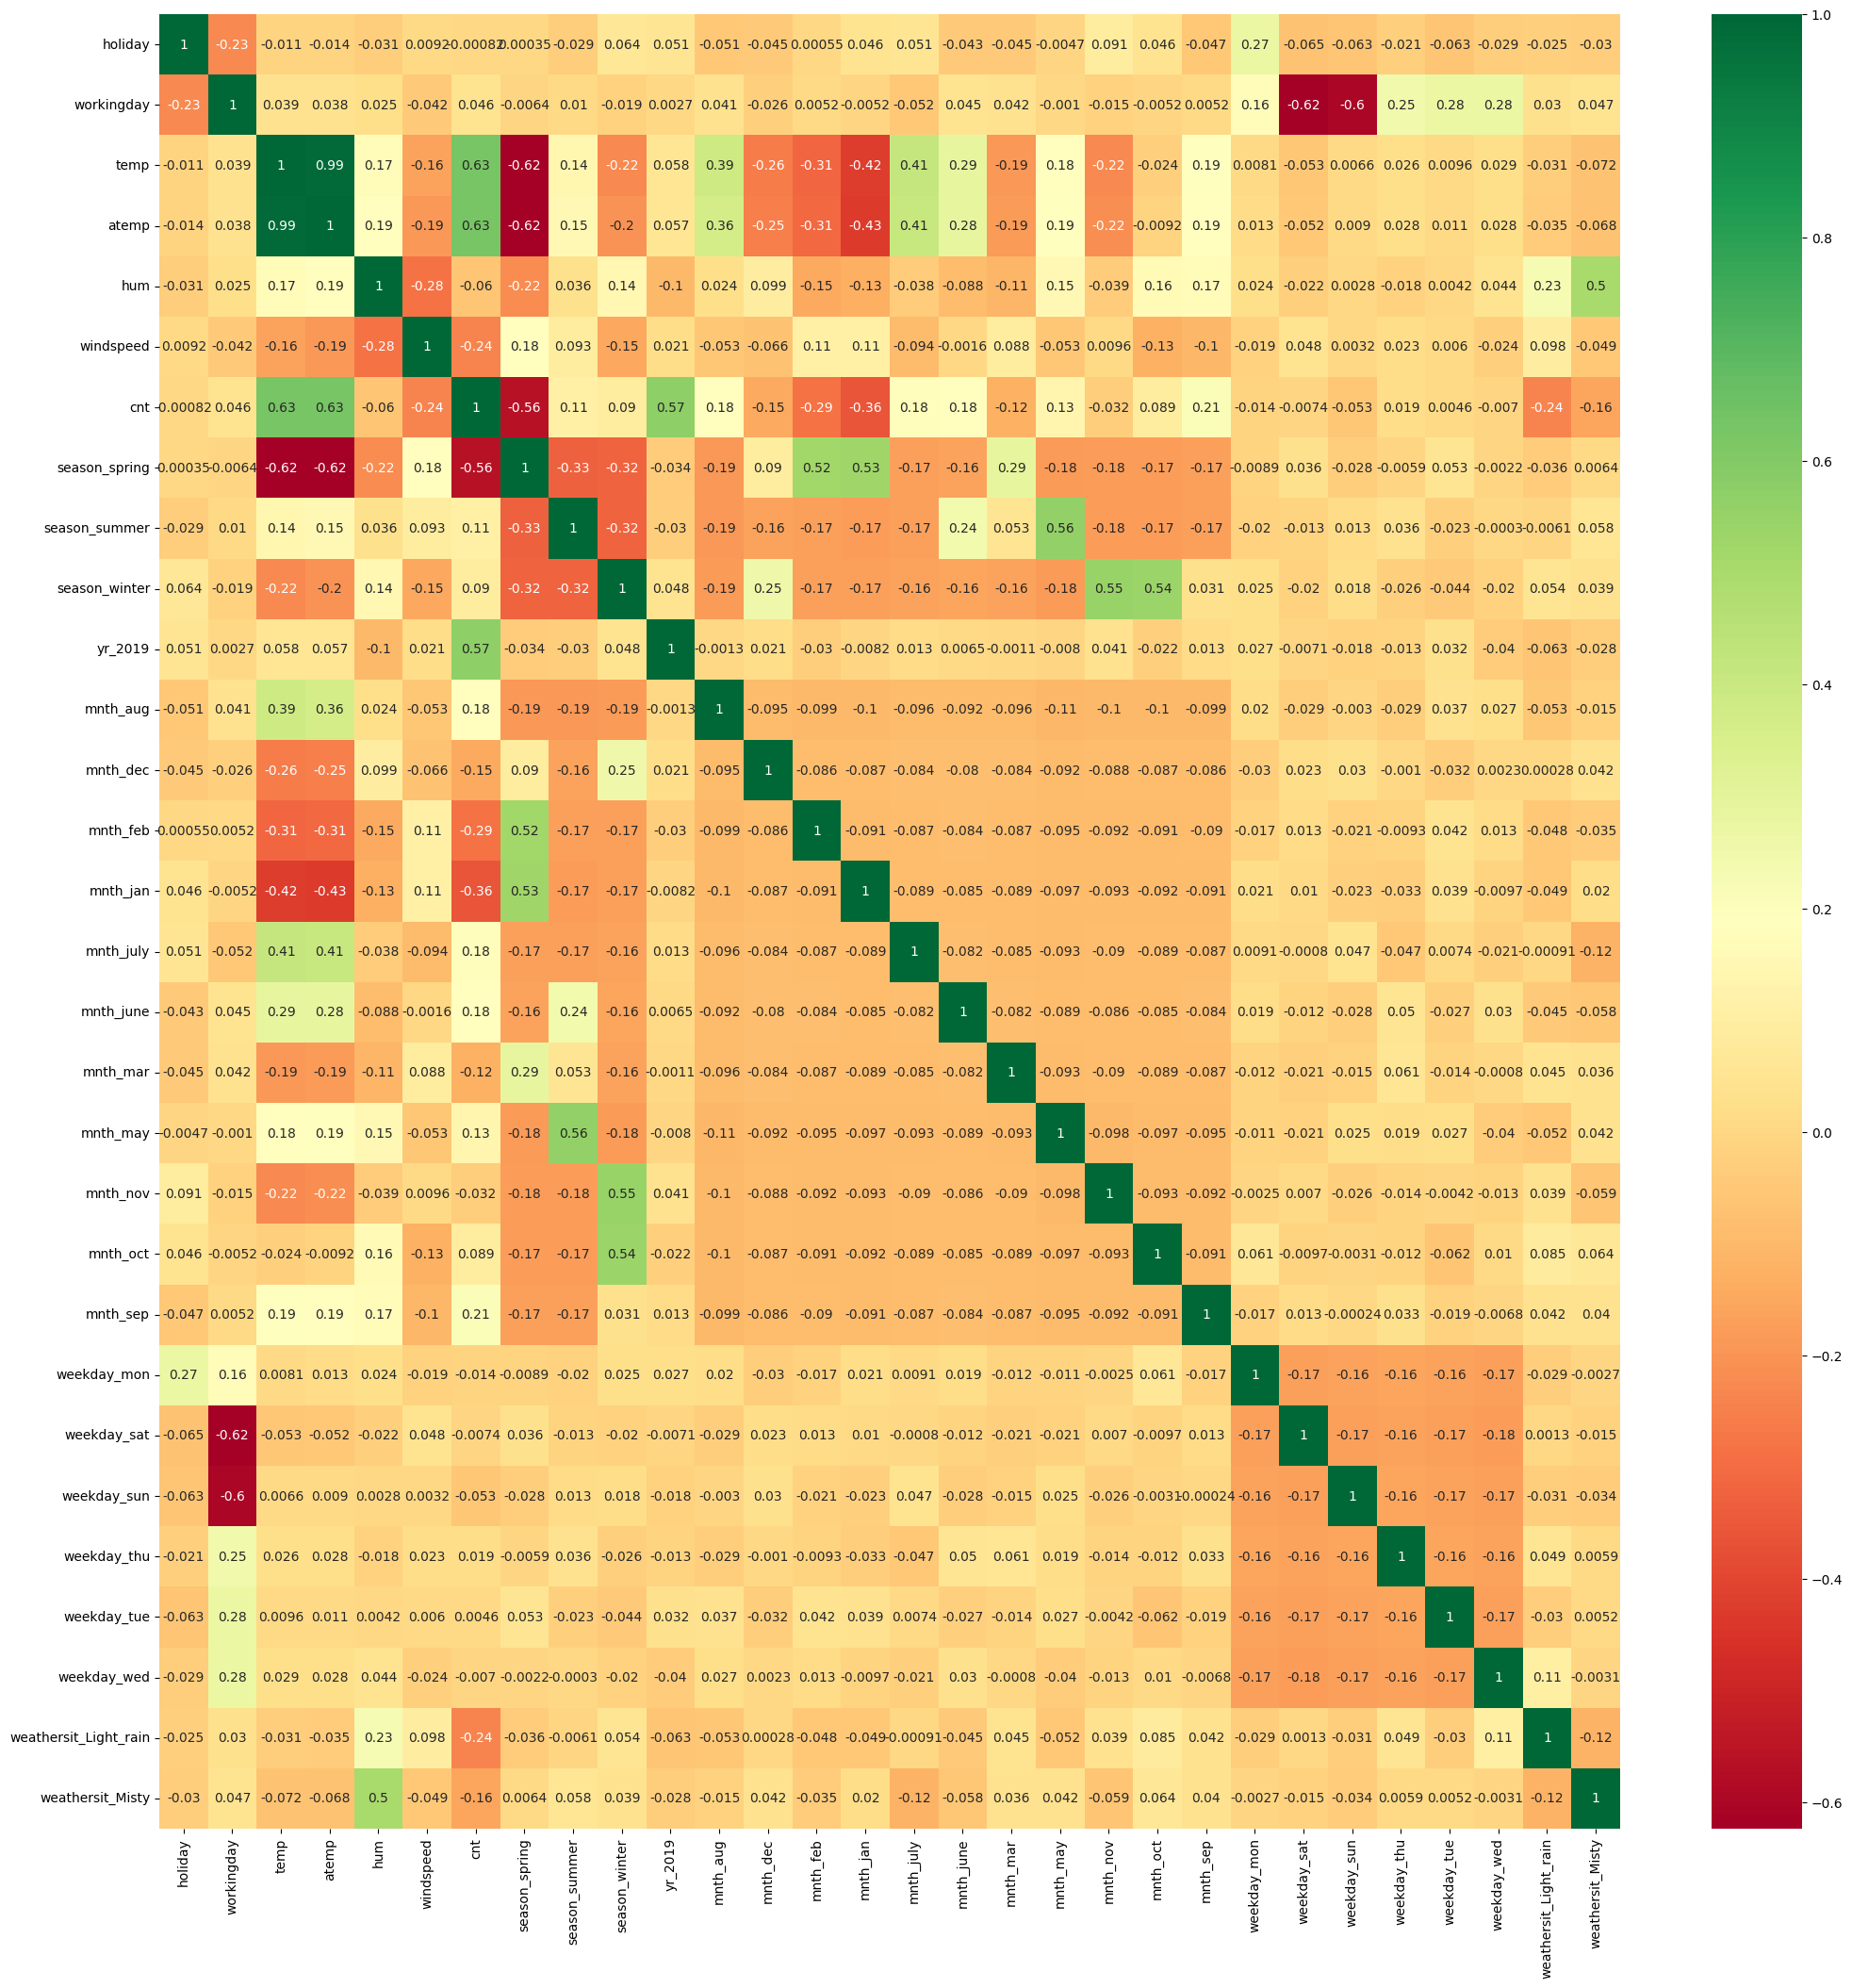

In [600]:
plt.figure(figsize = (25,25))
sns.heatmap(df_train.corr(),annot = True,cmap="RdYlGn")

### BUILDING A LINEAR MODEL

### Dividing into X and Y sets for the model building

In [601]:
y_train = df_train.pop('cnt')
X_train = df_train

### RFE
Recursive feature elimination: We will be using the **LinearRegression function from SciKit Learn**  for its compatibility with RFE (which is a utility from sklearn)

In [602]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [603]:
# Running RFE with the output number of the variable equal to 15
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, step = 15)            # running RFE
rfe = rfe.fit(X_train, y_train)

In [604]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_spring', True, 1),
 ('season_summer', False, 2),
 ('season_winter', True, 1),
 ('yr_2019', True, 1),
 ('mnth_aug', False, 2),
 ('mnth_dec', False, 2),
 ('mnth_feb', False, 2),
 ('mnth_jan', False, 2),
 ('mnth_july', False, 2),
 ('mnth_june', False, 2),
 ('mnth_mar', False, 2),
 ('mnth_may', False, 2),
 ('mnth_nov', True, 1),
 ('mnth_oct', False, 2),
 ('mnth_sep', True, 1),
 ('weekday_mon', False, 2),
 ('weekday_sat', True, 1),
 ('weekday_sun', True, 1),
 ('weekday_thu', False, 2),
 ('weekday_tue', False, 2),
 ('weekday_wed', False, 2),
 ('weathersit_Light_rain', True, 1),
 ('weathersit_Misty', False, 2)]

In [605]:
col = X_train.columns[rfe.support_]
col

Index(['holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'season_spring', 'season_winter', 'yr_2019', 'mnth_nov', 'mnth_sep',
       'weekday_sat', 'weekday_sun', 'weathersit_Light_rain'],
      dtype='object')

In [606]:
X_train.columns[~rfe.support_]

Index(['season_summer', 'mnth_aug', 'mnth_dec', 'mnth_feb', 'mnth_jan',
       'mnth_july', 'mnth_june', 'mnth_mar', 'mnth_may', 'mnth_oct',
       'weekday_mon', 'weekday_thu', 'weekday_tue', 'weekday_wed',
       'weathersit_Misty'],
      dtype='object')

In [607]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

#### Building Linear model with Stats

#### Multicollinearity
##### Calculate VIF for selected variables

In [608]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
def vif_calc(df):
    vif = pd.DataFrame()
    vif['Features'] = df.columns
    vif['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif


In [609]:
vif_calc(X_train_rfe)

,Features,VIF
2,temp,52.82
3,atemp,51.64
1,workingday,42.08
11,weekday_sat,9.98
12,weekday_sun,9.56
6,season_spring,2.65
0,holiday,2.50
7,season_winter,2.08
9,mnth_nov,1.53
4,hum,1.26


In [610]:
import statsmodels.api as sm

# Add a constant
X_train_lm1 = sm.add_constant(X_train_rfe)

# Create a first fitted model
lr1 = sm.OLS(y_train, X_train_lm1).fit()

In [611]:
# Check the parameters obtained

lr1.params

const                    0.315663
holiday                  0.050679
workingday               0.096650
temp                     0.286331
atemp                    0.179352
hum                     -0.266988
windspeed               -0.186931
season_spring           -0.120403
season_winter            0.070643
yr_2019                  0.227456
mnth_nov                -0.044298
mnth_sep                 0.071614
weekday_sat              0.109920
weekday_sun              0.058414
weathersit_Light_rain   -0.223449
dtype: float64

In [612]:
# Print a summary of the linear regression model obtained
print(lr1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     182.8
Date:                Tue, 08 Nov 2022   Prob (F-statistic):          1.30e-179
Time:                        12:59:41   Log-Likelihood:                 487.11
No. Observations:                 510   AIC:                            -946.2
Df Residuals:                     496   BIC:                            -886.9
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.31


Since atemp variable is showing high P value. So we can remove that variable

In [613]:
X_train_new = X_train_rfe.drop(['atemp'], axis = 1)
vif_calc(X_train_new)

,Features,VIF
1,workingday,41.73
10,weekday_sat,9.89
11,weekday_sun,9.48
5,season_spring,2.65
2,temp,2.62
0,holiday,2.49
6,season_winter,2.06
8,mnth_nov,1.53
3,hum,1.26
4,windspeed,1.17


### VIF Check

In [614]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif_calc(X_train_new)

,Features,VIF
1,workingday,41.73
10,weekday_sat,9.89
11,weekday_sun,9.48
5,season_spring,2.65
2,temp,2.62
0,holiday,2.49
6,season_winter,2.06
8,mnth_nov,1.53
3,hum,1.26
4,windspeed,1.17


In [615]:
# Add a constant
X_train_lm2 = sm.add_constant(X_train_new)

# Create a first fitted model
lr2 = sm.OLS(y_train, X_train_lm2).fit()

In [616]:
# Check the parameters obtained

lr2.params

const                    0.318627
holiday                  0.050588
workingday               0.097520
temp                     0.452096
hum                     -0.265319
windspeed               -0.193388
season_spring           -0.120707
season_winter            0.072048
yr_2019                  0.227462
mnth_nov                -0.044905
mnth_sep                 0.070485
weekday_sat              0.111014
weekday_sun              0.059505
weathersit_Light_rain   -0.224429
dtype: float64

In [617]:
# Print a summary of the linear regression model obtained
print(lr2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     197.7
Date:                Tue, 08 Nov 2022   Prob (F-statistic):          2.03e-180
Time:                        12:59:41   Log-Likelihood:                 486.28
No. Observations:                 510   AIC:                            -946.6
Df Residuals:                     497   BIC:                            -891.5
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.31

 - Removing the variable 'hum' based on its Very High 'VIF' value.
 - Even though the VIF of hum is second highest, we decided to drop 'hum' and not 'temp' based on general knowledge that temperature can be an important factor for a business like bike rentals, and wanted to retain 'temp'.

In [618]:
X_train_new = X_train_new.drop(["hum"], axis = 1)

### VIF Check

In [619]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif_calc(X_train_new)


,Features,VIF
1,workingday,23.74
9,weekday_sat,5.92
10,weekday_sun,5.71
4,season_spring,2.64
2,temp,2.60
5,season_winter,2.03
0,holiday,1.90
7,mnth_nov,1.51
3,windspeed,1.10
8,mnth_sep,1.07


In [620]:
# Add a constant
X_train_lm3 = sm.add_constant(X_train_new)

# Create a first fitted model
lr3 = sm.OLS(y_train, X_train_lm3).fit()

In [621]:
lr3.params

const                    0.174149
holiday                  0.017064
workingday               0.060480
temp                     0.431917
windspeed               -0.133694
season_spring           -0.116415
season_winter            0.056548
yr_2019                  0.235067
mnth_nov                -0.029855
mnth_sep                 0.058160
weekday_sat              0.074160
weekday_sun              0.022445
weathersit_Light_rain   -0.285048
dtype: float64

In [622]:
# Print a summary of the linear regression model obtained
print(lr3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.802
Model:                            OLS   Adj. R-squared:                  0.797
Method:                 Least Squares   F-statistic:                     183.2
Date:                Tue, 08 Nov 2022   Prob (F-statistic):          3.92e-167
Time:                        12:59:42   Log-Likelihood:                 452.03
No. Observations:                 510   AIC:                            -880.1
Df Residuals:                     498   BIC:                            -829.2
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.17

- Removing the variable 'workingday' based on its Very High 'VIF' value.
- Even though the VIF of workingday is second highest, we decided to drop 'workingday' and not 'temp' based on general knowledge that temperature can be an important factor for a business like bike rentals, and wanted to retain 'temp'.

In [623]:
X_train_new = X_train_new.drop(["workingday"], axis = 1)

### VIF Check

In [624]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif_calc(X_train_new)

,Features,VIF
2,windspeed,4.87
1,temp,4.12
5,yr_2019,2.04
4,season_winter,1.87
3,season_spring,1.72
6,mnth_nov,1.63
8,weekday_sat,1.21
9,weekday_sun,1.20
7,mnth_sep,1.16
0,holiday,1.05


In [625]:
# Add a constant
X_train_lm4 = sm.add_constant(X_train_new)

# Create a first fitted model
lr4 = sm.OLS(y_train, X_train_lm4).fit()

In [626]:
# Check the parameters obtained

lr4.params

const                    0.234629
holiday                 -0.043416
temp                     0.431917
windspeed               -0.133694
season_spring           -0.116415
season_winter            0.056548
yr_2019                  0.235067
mnth_nov                -0.029855
mnth_sep                 0.058160
weekday_sat              0.013680
weekday_sun             -0.038034
weathersit_Light_rain   -0.285048
dtype: float64

In [627]:
# Print a summary of the linear regression model obtained
print(lr4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.802
Model:                            OLS   Adj. R-squared:                  0.797
Method:                 Least Squares   F-statistic:                     183.2
Date:                Tue, 08 Nov 2022   Prob (F-statistic):          3.92e-167
Time:                        12:59:42   Log-Likelihood:                 452.03
No. Observations:                 510   AIC:                            -880.1
Df Residuals:                     498   BIC:                            -829.2
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.23


- This model looks good, as there seems to be VERY LOW Multicollinearity between the predictors and the p-values for all the predictors seems to be significant. For now, we will consider this as our final model (unless the Test data metrics are not significantly close to this number).

### Final Model Interpretation

## Hypothesis Testing:

Hypothesis testing states that:
- H0:B1=B2=...=Bn=0 
- H1:  at least one  Bi!=0

### lr6 model coefficient values

- const 0.084143
- yr 0.230846
- workingday 0.043203
- temp 0.563615
- windspeed -0.155191
- season_2 0.082706
- season_4 0.128744
- mnth_9 0.094743
- weekday_6 0.056909
- weathersit_2 -0.074807
- weathersit_3 -0.306992

### Insights
- From the lr6 model summary, it is evident that all our coefficients are not equal to zerowhich means **We REJECT the NULL HYPOTHESIS**
    

#### F Statistics

F-Statistics is used for testing the overall significance of the Model: Higher the F-Statistics, more significant the Model is.

- F-statistic: 233.8
- Prob (F-statistic): 3.77e-181

The F-Statistics value of 233 (which is greater than 1) and the p-value of '~0.0000' states that the overall model is significant

### The equation of best fitted surface based on model lr6:

cnt = 0.084143 + (**yr** × 0.230846) + (**workingday** × 0.043203) + (**temp** × 0.563615) − (**windspeed** × 0.155191) + (**season2** × 0.082706) + (**season4** ×0.128744) + (**mnth9** × 0.094743) + (**weekday6** ×0.056909) − (**weathersit2** × 0.074807) − (**weathersit3** × 0.306992)

#### Interpretation of Coefficients:
**temp:** A coefficient value of ‘0.5636’ indicated that a unit increase in temp variable, increases the bike hire numbers by 0.5636 units.

**weathersit_3:** A coefficient value of ‘-0.3070’ indicated that, w.r.t Weathersit1, a unit increase in Weathersit3 variable, decreases the bike hire numbers by 0.3070 units.

**yr:** A coefficient value of ‘0.2308’ indicated that a unit increase in yr variable, increases the bike hire numbers by 0.2308 units.

**season_4:** A coefficient value of ‘0.128744’ indicated that w.r.t season_1, a unit increase in season_4 variable increases the bike hire numbers by 0.128744 units.

**windspeed:** A coefficient value of ‘-0.155191’ indicated that, a unit increase in windspeed variable decreases the bike hire numbers by 0.155191 units.

**workingday:** A coefficient value of ‘0.043203’ indicated that, a unit increase in workingday variable increases the bike hire numbers by 0.043203 units.

**season_2:** A coefficient value of ‘0.082706’ indicated that w.r.t season_1, a unit increase in season_2 variable decreases the bike hire numbers by 0.082706 units.

**mnth_9:** A coefficient value of ‘0.094743’ indicated that w.r.t mnth_1, a unit increase in mnth_9 variable increases the bike hire numbers by 0.094743 units.

**weekday_6:** A coefficient value of ‘0.056909’ indicated that w.r.t weekday_1, a unit increase in weekday_6 variable increases the bike hire numbers by 0.056909 units.

**weathersit_2:** A coefficient value of ‘-0.074807’ indicated that, w.r.t Weathersit1, a unit increase in Weathersit2 variable, decreases the bike hire numbers by 0.074807 units.

**const:** The Constant value of ‘0.084143’ indicated that, in the absence of all other predictor variables (i.e. when x1,x2...xn =0), The bike rental can still increase by 0.084143 units.

### ASSUMPTIONS 

#### Error terms are normally distributed with mean zero (not X, Y)
- Residual Analysis Of Training Data

In [628]:
y_train_pred = lr4.predict(X_train_lm4)

Text(0.5, 0, 'Errors')

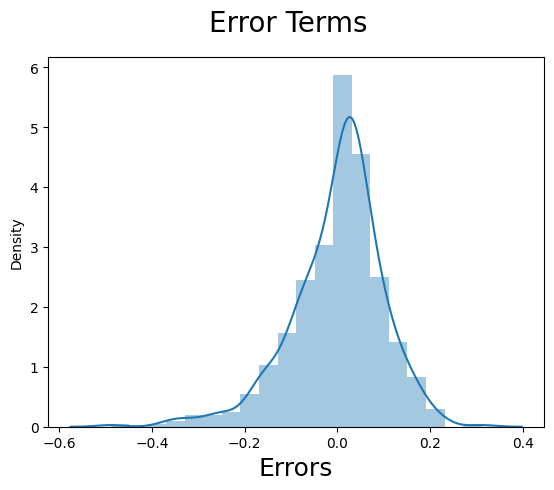

In [629]:
res = y_train-y_train_pred
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((res), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

### Insights
- From the above histogram, we could see that the Residuals are normally distributed. Hence our assumption for Linear Regression is valid.

#### There is a linear relationship between X and Y

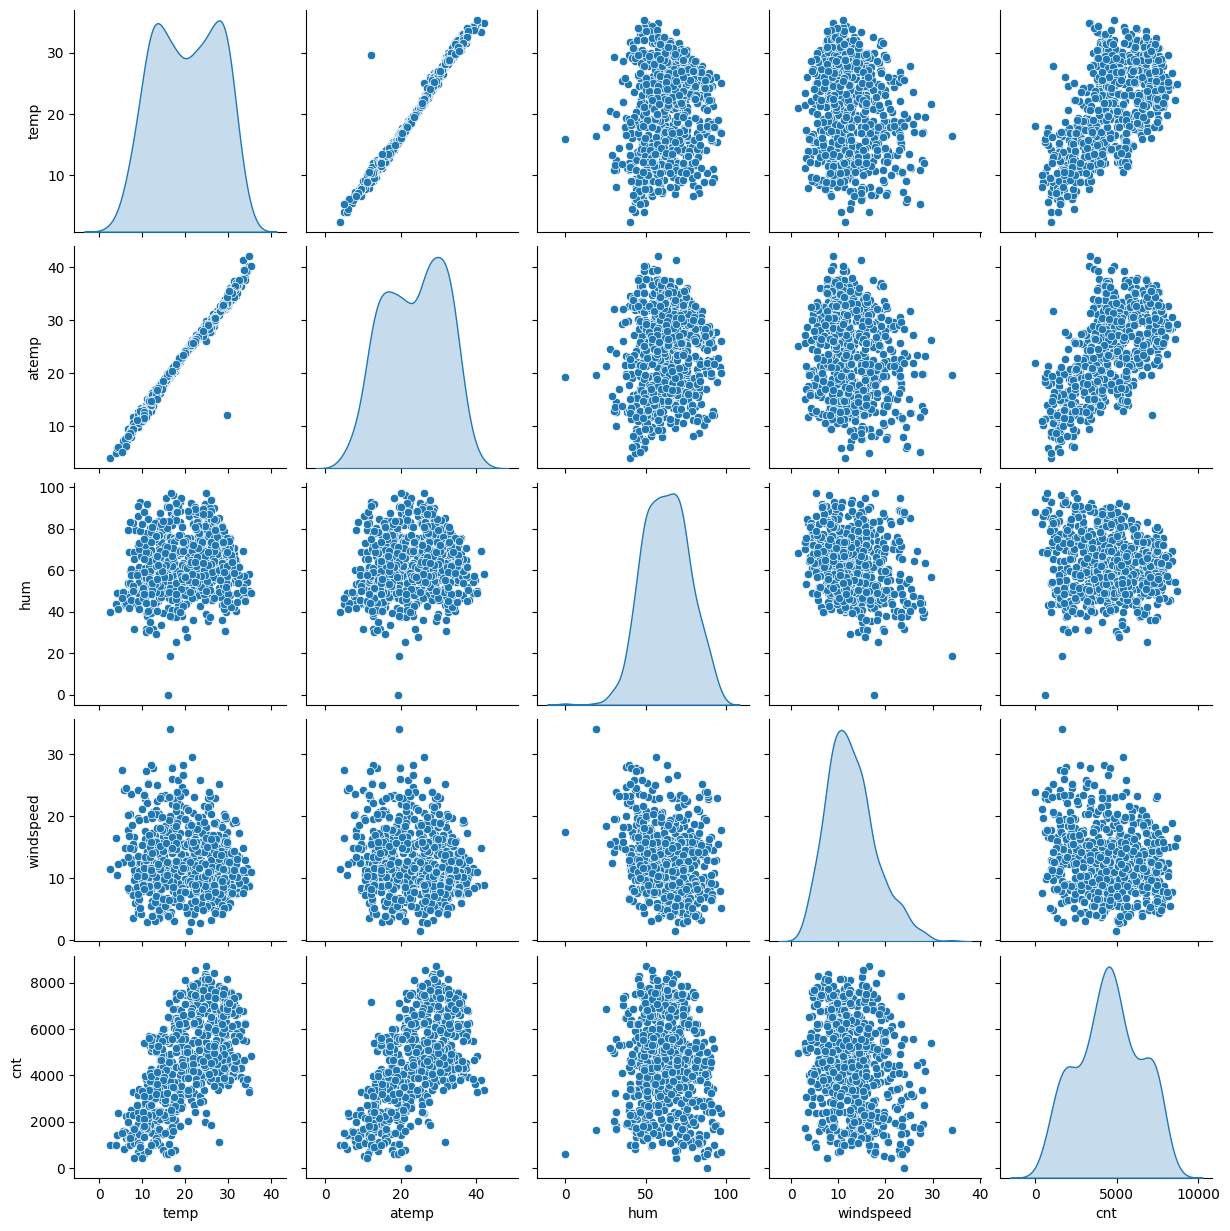

In [630]:
bike_new=bike_new[[ 'temp', 'atemp', 'hum', 'windspeed','cnt']]

sns.pairplot(bike_new, diag_kind='kde')
plt.show()

- Using the pair plot, we could see there is a linear relation between temp and atemp variable with the predictor ‘cnt’.

##### There is No Multicollinearity between the predictor variables

In [631]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif_calc(X_train_new)

,Features,VIF
2,windspeed,4.87
1,temp,4.12
5,yr_2019,2.04
4,season_winter,1.87
3,season_spring,1.72
6,mnth_nov,1.63
8,weekday_sat,1.21
9,weekday_sun,1.20
7,mnth_sep,1.16
0,holiday,1.05


 - From the VIF calculation we could find that there is no multicollinearity existing between the predictor variables, as all the values are within permissible range of below 5

#### MAKING PREDICTION USING FINAL MODEL

Now that we have fitted the model and checked the assumptions, it's time to go ahead and make predictions using the final model (lr6)

### Applying the scaling on the test sets

In [632]:
# Apply scaler() to all numeric variables in test dataset. Note: we will only use scaler.transform, 
# as we want to use the metrics that the model learned from the training data to be applied on the test data. 
# In other words, we want to prevent the information leak from train to test dataset.

num_vars = ['temp', 'atemp', 'hum', 'windspeed','cnt']

df_test[num_vars] = scaler.transform(df_test[num_vars])

In [633]:
df_test.head()

,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,season_winter,...,mnth_oct,mnth_sep,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_Light_rain,weathersit_Misty
22,0,0,0.046591,0.025950,0.453529,0.462217,0.110907,1,0,0,...,0,0,0,0,1,0,0,0,0,0
468,0,0,0.543115,0.536771,0.522511,0.347424,0.855729,0,1,0,...,0,0,0,1,0,0,0,0,0,0
553,0,0,0.951196,0.933712,0.596104,0.212829,0.534975,0,0,0,...,0,0,0,0,1,0,0,0,0,0
504,0,0,0.699909,0.662746,0.551083,0.478229,0.817648,0,1,0,...,0,0,0,0,1,0,0,0,0,0
353,0,1,0.407087,0.416610,0.618615,0.080770,0.428900,0,0,1,...,0,0,0,0,0,0,1,0,0,1


In [634]:
df_test.describe()

,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,season_winter,...,mnth_oct,mnth_sep,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_Light_rain,weathersit_Misty
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.041096,0.684932,0.551225,0.527528,0.662567,0.346706,0.518889,0.237443,0.264840,0.251142,...,0.086758,0.082192,0.155251,0.127854,0.146119,0.173516,0.146119,0.118721,0.036530,0.324201
std,0.198967,0.465607,0.229463,0.215434,0.143562,0.159553,0.219953,0.426491,0.442259,0.434663,...,0.282125,0.275286,0.362974,0.334692,0.354034,0.379560,0.354034,0.324202,0.188034,0.469148
min,0.000000,0.000000,0.046591,0.025950,0.301299,0.073090,0.055683,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.356479,0.348019,0.553031,0.232689,0.364703,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1.000000,0.557653,0.549198,0.662338,0.328208,0.525771,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,1.000000,0.751309,0.709163,0.762338,0.435708,0.676887,0.000000,1.000000,0.500000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,0.984424,0.980934,1.010390,0.824380,0.963300,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Dividing into X_test and y_test

In [635]:
y_test = df_test.pop('cnt')
X_test = df_test
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219 entries, 22 to 313
Data columns (total 29 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   holiday                219 non-null    int64  
 1   workingday             219 non-null    int64  
 2   temp                   219 non-null    float64
 3   atemp                  219 non-null    float64
 4   hum                    219 non-null    float64
 5   windspeed              219 non-null    float64
 6   season_spring          219 non-null    uint8  
 7   season_summer          219 non-null    uint8  
 8   season_winter          219 non-null    uint8  
 9   yr_2019                219 non-null    uint8  
 10  mnth_aug               219 non-null    uint8  
 11  mnth_dec               219 non-null    uint8  
 12  mnth_feb               219 non-null    uint8  
 13  mnth_jan               219 non-null    uint8  
 14  mnth_july              219 non-null    uint8  
 15  mnth_

In [636]:
#Selecting the variables that were part of final model.
col1=X_train_new.columns
X_test=X_test[col1]
# Adding constant variable to test dataframe
X_test_lm6 = sm.add_constant(X_test)
X_test_lm6.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219 entries, 22 to 313
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   const                  219 non-null    float64
 1   holiday                219 non-null    int64  
 2   temp                   219 non-null    float64
 3   windspeed              219 non-null    float64
 4   season_spring          219 non-null    uint8  
 5   season_winter          219 non-null    uint8  
 6   yr_2019                219 non-null    uint8  
 7   mnth_nov               219 non-null    uint8  
 8   mnth_sep               219 non-null    uint8  
 9   weekday_sat            219 non-null    uint8  
 10  weekday_sun            219 non-null    uint8  
 11  weathersit_Light_rain  219 non-null    uint8  
dtypes: float64(3), int64(1), uint8(8)
memory usage: 10.3 KB


In [637]:
# Making predictions using the final model (lr6)

y_pred = lr4.predict(X_test_lm6)

#### MODEL EVALUATION

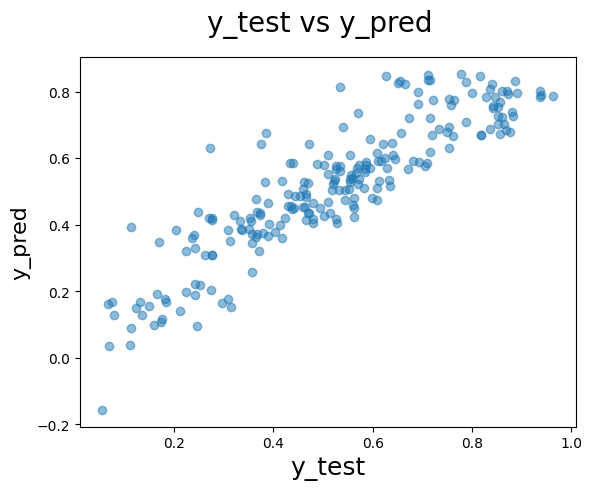

In [638]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred, alpha=.5)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16) 
plt.show()

 #### R^2 Value for TEST

In [639]:
r2_score(y_test, y_pred)

0.7966975737467272

#### Adjusted R^2 Value for TEST

In [640]:
# We already have the value of R^2 (calculated in above step)

r2=0.7966975737467272

In [641]:
# Get the shape of X_test
X_test.shape


(219, 11)

In [642]:
# n is number of rows in X

n = X_test.shape[0]


# Number of features (predictors, p) is the shape along axis 1
p = X_test.shape[1]

# We find the Adjusted R-squared using the formula

adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
adjusted_r2

0.7858940631728818

### Final Result Comparison

- Train R^2 :0.824
- Train Adjusted R^2 :0.821 
- Test R^2 :0.820
- Test Adjusted R^2 :0.812 
- This seems to be a really good model that can very well 'Generalize' various datasets.

### FINAL REPORT

As per our final Model, the top 3 predictor variables that influences the bike booking are: 
- **Temperature (temp)** - A coefficient value of ‘0.5636’ indicated that a unit increase in temp variable increases the bike hire numbers by 0.5636 units. 
- **Weather Situation 3 (weathersit_3)** - A coefficient value of ‘-0.3070’ indicated that, w.r.t Weathersit1, a unit increase in Weathersit3 variable decreases the bike hire numbers by 0.3070 units.
- **Year (yr)** - A coefficient value of ‘0.2308’ indicated that a unit increase in yr variable increases the bike hire numbers by 0.2308 units. 

#### So, it's suggested to consider these variables utmost importance while planning, to achive maximum Booking

The next best features that can also be considered are 
- **season_winter:** - A coefficient value of ‘0.128744’ indicated that w.r.t season_1, a unit increase in season_4 variable increases the bike hire numbers by 0.128744 units. 
- **windspeed:** - A coefficient value of ‘-0.155191’ indicated that, a unit increase in windspeed variable decreases the bike hire numbers by 0.155191 units. 

 #### NOTE: 
 - The details of weathersit_1 & weathersit_3 
 - **weathersit_1:** Clear, Few clouds, Partly cloudy, Partly cloudy
 - **weathersit_3:** Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds 